In [142]:
 #Install Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

# Load the dataset

In [143]:
df = pd.read_csv('./tn.movie_budgets.csv')

# Check the structure of the DataFrame
#Display the first few rows of the dataset

In [144]:
print(df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [145]:
#find shape of our data set
df.shape

(5782, 6)

#find information about our data set

In [146]:
df.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

#data cleaning
# Check for missing values

In [147]:
df = df.dropna()

In [148]:
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


#remove duplicate data
no duplicate

statistics about our Data Frame

In [149]:
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


get overall DataFrame statistics

In [150]:
df.describe (include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


Data analysis

In [151]:
#Determine budget movie
df['production_budget'] = df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
highest_budget_movie = df.nlargest(1, 'production_budget')
print(highest_budget_movie)


   id  release_date   movie  production_budget domestic_gross worldwide_gross
0   1  Dec 18, 2009  Avatar        425000000.0   $760,507,625  $2,776,345,279


In [152]:
#find the mean budget
mean_budget = df['production_budget'].mean()
print(f"The mean production budget is ${mean_budget:,.2f}.")

The mean production budget is $31,587,757.10.


#Data visualization

C:\Users\custohmer link\AppData\Local\Temp\ipykernel_11156\3211813448.py:13: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\custohmer link\AppData\Local\Temp\ipykernel_11156\3211813448.py:13: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


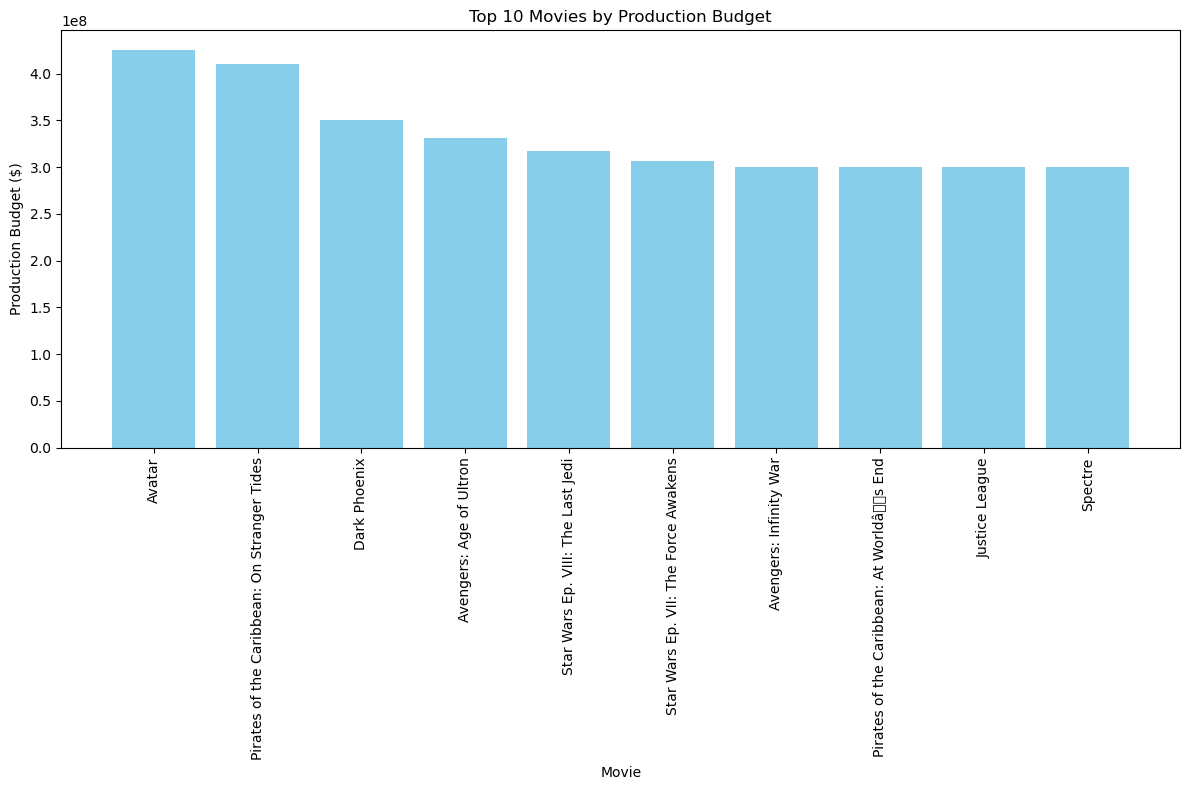

In [153]:
import matplotlib.pyplot as plt
df['production_budget'] = df['production_budget'].replace('[\$,]', '', regex=True).astype(float)


top_movies = df.nlargest(10, 'production_budget')[['movie', 'production_budget']]

plt.figure(figsize=(12, 8))
plt.bar(top_movies['movie'], top_movies['production_budget'], color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Production Budget ($)')
plt.title('Top 10 Movies by Production Budget')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plot a scatter diagram

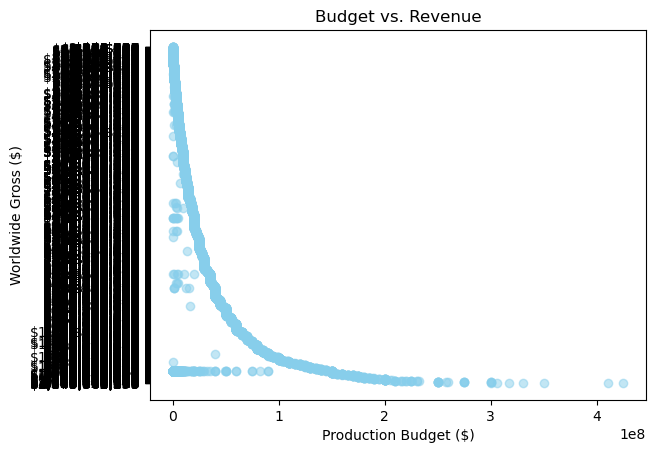

<Figure size 1000x600 with 0 Axes>

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['production_budget'], df['worldwide_gross'], color='skyblue', alpha=0.5)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Budget vs. Revenue')
plt.figure(figsize=(10, 6))
plt.show()
